## Data Profiling

### About the dataset:

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# read test file
test_data = pd.read_csv('../input/restaurant-revenue-prediction/test.csv.zip')
# read training data
raw_df = pd.read_csv('../input/restaurant-revenue-prediction/train.csv.zip')

In [2]:
print(f"Shape of training data: {raw_df.shape}\nShape of test dataset: {test_data.shape} \
    \nFeatures available: {raw_df.columns}")

Shape of training data: (137, 43)
Shape of test dataset: (100000, 42)     
Features available: Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


In [3]:
# To see all the columns in output this can be done.
pd.options.display.max_columns=None
# To see all rows change max_columns with max_rows

raw_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
raw_df.isnull().sum().any()

False

* There are no missing values.
* Last column 'revenue' is our target column.
* Features from P1 to P37 are all numerical features about which we know nothing specifically. So, I will directly feed them into my model.
* Id column is redundant, I will drop it. To avoid it we can choose it as index column while reading data.i.e., using pd.read_csv('*filepath*',index_col=*col_name_or_positional_no*)
* In feature Open date, I will focus on month and year and drop date values.
* City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable form which is numerical form.

In [5]:
raw_df.drop('Id',axis=1,inplace=True)

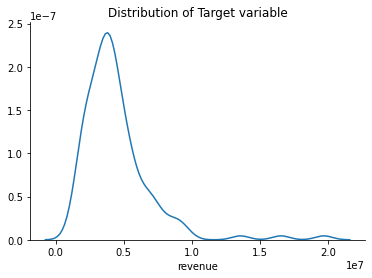

In [6]:
sns.distplot(raw_df['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine(); #to remove top and right spines

If we remove outliers our target variable will follow a normal distribution.(with a little bit skew)

In [7]:
raw_df = raw_df[raw_df['revenue']<8e+06].copy()

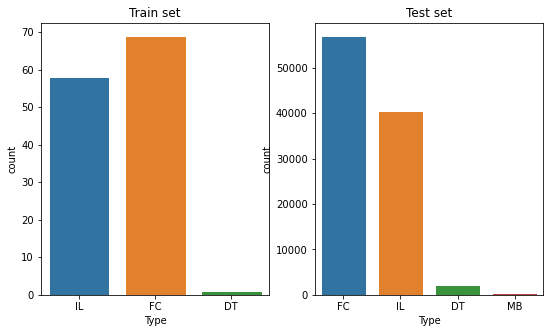

In [8]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(raw_df.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(test_data.Type,ax=ax[1])
ax[1].set_title('Test set');

:(

There is not even asingle observation of type 'MB' in training set. This is a problem for our model.

In [9]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([raw_df,test_data],axis=0)

# Extracting month and year from date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

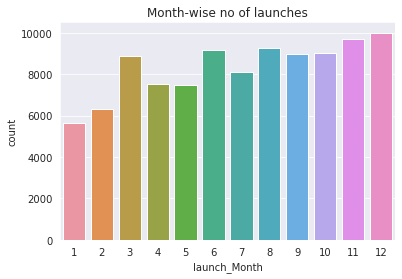

In [10]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches');

Second half of the year seems to witness more restaurant launches.

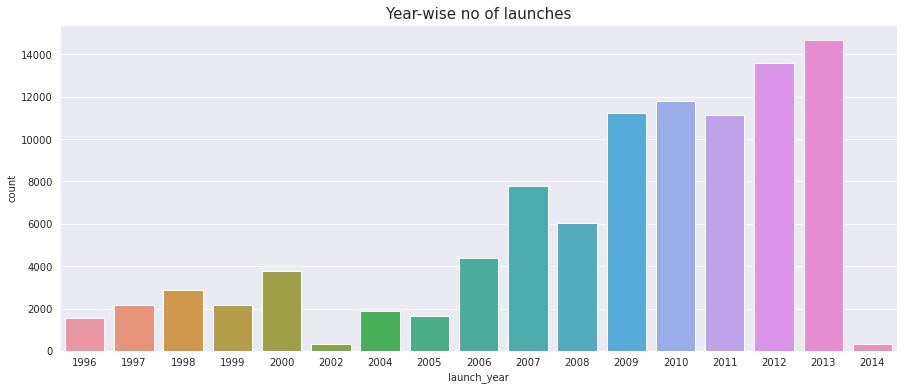

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

With time, number of restaurants in the area is increasing due to several social factors.

## Preprocessing the data

In [12]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [13]:
df['City Group'].value_counts()

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [14]:
df['City'].value_counts()

İstanbul     34130
Ankara        8739
İzmir         6472
Antalya       5915
Kocaeli       4365
             ...  
Tokat            1
Kastamonu        1
Osmaniye         1
Elazığ           1
Amasya           1
Name: City, Length: 63, dtype: int64

**Oops!** There are 63 different City values. I can create dummy variables to handle this feature but it will lead to so many columns. A good approach will be to reduce categories in this column. For example, instead of cities categories can be different zones or tier-1,tier-2 and so on.
Here, I am dropping this column as there is not much information about which countries are involved. Also, the feature City Group covers effect of this feature as well.

In [15]:
df.drop('City',axis=1,inplace=True)

In [16]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [17]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

Revenue is a bit higher in months of Jan, Sept and Oct.

In [18]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

* Year 1999 has recorded highest revenues.
* Years 2000, 2013 and 2014 proved to be worst years for restaurants. Though number of observations is too low for year 2014, may be the big picture is differnt from this

In [19]:
# creating dummy variables
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [20]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [21]:
processed_df.shape,processed_test_data.shape

((128, 70), (100000, 69))

In [22]:
#Check it once
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,launch_year_1996,launch_year_1997,launch_year_1998,launch_year_1999,launch_year_2000,launch_year_2001,launch_year_2002,launch_year_2003,launch_year_2004,launch_year_2005,launch_year_2006,launch_year_2007,launch_year_2008,launch_year_2009,launch_year_2010,launch_year_2011,launch_year_2012,launch_year_2013,launch_year_2014,launch_Month_10,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Modelling

Split train data further into training and testing sets to see performance of each ML model.
Then, apply models.

In [23]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

,MAE,MSE,R2-score
Linear Regression,1.904764e+06,5.764211e+12,-1.274732
Logistic Regression,1.302039e+06,2.478689e+12,0.021835
Decision Tree,1.539422e+06,3.469479e+12,-0.369161
Random Forest,1.149723e+06,2.007754e+12,0.207680
Support Vector Machines,1.407327e+06,2.555855e+12,-0.008618
K-nearest Neighbors,1.171290e+06,1.983233e+12,0.217356
XGBoost,1.057680e+06,1.946985e+12,0.231661


In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [.03, 0.05, .07,.09], #so called `eta` value
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:   15.2s finished


0.08238714183760025
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}


In [26]:
xgb=XGBRegressor(colsample_bytree=0.7,learning_rate=0.05,max_depth=7,min_child_weight=4,
                n_estimators=500,subsample=0.7)
xgb.fit(X,y)
predicted_test_values = xgb.predict(processed_test_data)
submission1 = pd.DataFrame(columns=['Id','Prediction'])
submission1['Id'] = test_data['Id']
submission1['Prediction'] = predicted_test_values
submission1.to_csv('submission_xgb.csv',index=False)

In [27]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
predicted_test_values2 = knn.predict(processed_test_data)
submission2 = pd.DataFrame(columns=['Id','Prediction'])
submission2['Id'] = test_data['Id']
submission2['Prediction'] = predicted_test_values2
submission2.to_csv('submission_knn.csv',index=False)